In [1]:
data = tsc.loadSeriesLocal('/home/ubuntu/downloads/goodfisht.mat', inputformat='mat', varname='goodfish', minPartitions=4)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from thunder import PCA, RegressionModel, TuningModel, KMeansModel, Colorize, NMF, ICA
sns.set_context('notebook')
sns.set_style('darkgrid')
data.cache()

In [5]:
vis1=data.between(25,85)
vis1.cache()

In [13]:
L = len(vis1.index)
vis1s = np.zeros((1, L),dtype=np.int)
vis1s[0,4:54] = 1
linreg = RegressionModel.load(vis1s, "linear")
results = linreg.fit(vis1)

In [7]:
test=results.select('betas').collect()

In [8]:
test=np.asarray(test)

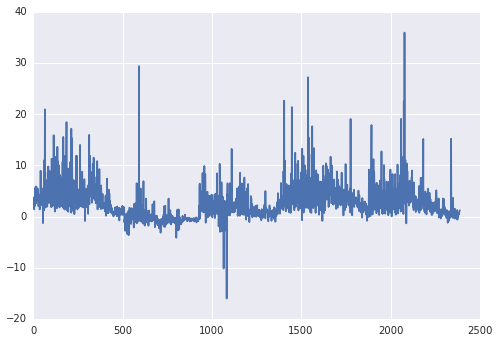

In [9]:
plt.plot(test[:,0],test[:,1])

In [124]:
from numpy import pi
vis1d = np.array([0, pi])
model = TuningModel.load(s, "circular")
params = model.fit(results.select('betas'))

In [10]:
L = len(vis1.index)
vis1b = np.zeros((2, L),dtype=np.int)
vis1b[0,4:29] = 1
vis1b[1,30:54] = 1
bilinreg = RegressionModel.load((vis1s,vis1b), "bilinear")
results = bilinreg.fit(vis1)

In [11]:
test=results.select('betas').collect()
test2=zip(*test)[1]

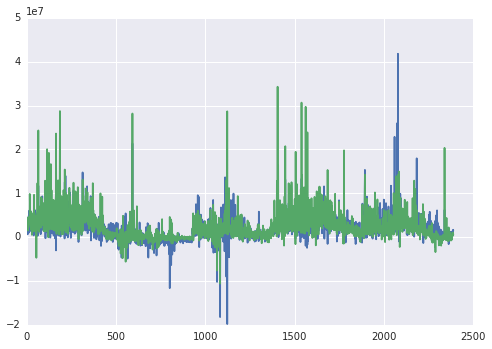

In [12]:
plt.plot(test2)

In [135]:
vis1d = np.array([0, pi])
model = TuningModel.load(vis1d, "gaussian")
params = model.fit(results.select('betas'))

In [136]:
params.first()

(0, array([ 3.14159265,  0.        ]))

In [51]:
import scipy.io

In [60]:
scipy.io.savemat('/mnt/downloads/tuning/avg_circ_tuning.mat', mdict={'circ_center':params.select('center').values().collect(),'circ_spread':params.select('spread').values().collect()}, oned_as='column', do_compression='true')

In [61]:
test=results.select('betas').values().collect()

In [63]:
scipy.io.savemat('/mnt/downloads/tuning/betas.mat', mdict={'betas':test}, oned_as='column', do_compression='true')

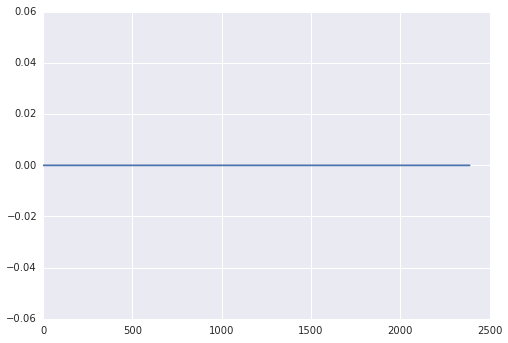

In [137]:
plt.plot(params.select('spread').values().collect())

In [139]:
vis2=data.between(90,125)
vis2.cache()

In [151]:
L = len(vis2.index)
vis2s = np.zeros((1, L),dtype=np.int)
vis2s[0,0:30] = 1
vis2sb = np.zeros((2, L),dtype=np.int)
vis2sb[0,0:15] = (3*pi)/2
vis2sb[1,15:30] = pi/2
bilinreg = RegressionModel.load((vis2s,vis2sb), "bilinear")
results = bilinreg.fit(vis2)

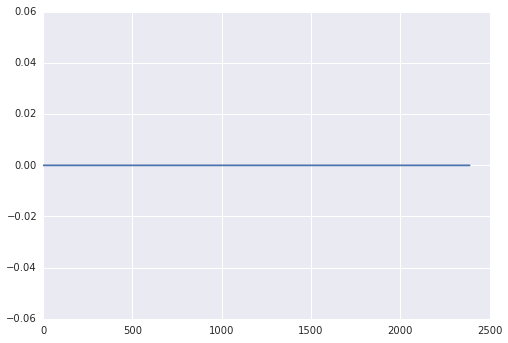

In [152]:
vis2d = np.array([-pi/2, pi/2])
model = TuningModel.load(vis2d, "circular")
params = model.fit(results.select('betas'))
plt.plot(params.select('spread').values().collect())

In [14]:
norm=data.normalize(baseline='percentile')

In [16]:
mean=norm.seriesMean()
mean.first()

(0, 1.0353709462865213)

In [150]:
vis2=norm.between(90,125)
vis2.cache()

In [17]:
vis1d1=norm.between(30,55).seriesMean()
vis1d2=norm.between(55,85).seriesMean()

In [18]:
vis1d1.first()

(0, 1.3301141009638202)

In [20]:
dir1=vis1d1.collect()
dir2=vis1d2.collect()
dir1[0]

(0, 1.3301141009638202)

In [22]:
dir1=np.asarray(dir1)
dir2=np.asarray(dir2)

In [25]:
dir1[:,0]

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         2.38600000e+03,   2.38700000e+03,   2.38800000e+03])

In [26]:
DSI=(dir1[:,1]-dir2[:,1])/(dir1[:,1]+dir2[:,1])

In [28]:
DSI1=DSI
DSI2=(dir2[:,1]-dir1[:,1])/(dir1[:,1]+dir2[:,1])

In [29]:
import scipy.io
scipy.io.savemat('/mnt/downloads/tuning/DSI.mat', mdict={'DSIleft':DSI1,'DSIright':DSI2}, oned_as='column', do_compression='true')